# How well do jobs and skills pay for Data Scientists?

### Methodology:
#### 1. evaluate median salary for top 6 data jobs
#### 2. find median salary per skill for data scientists
#### 3. visualize for highest paying skills and most demanded skills 

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

In [6]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [7]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [20]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

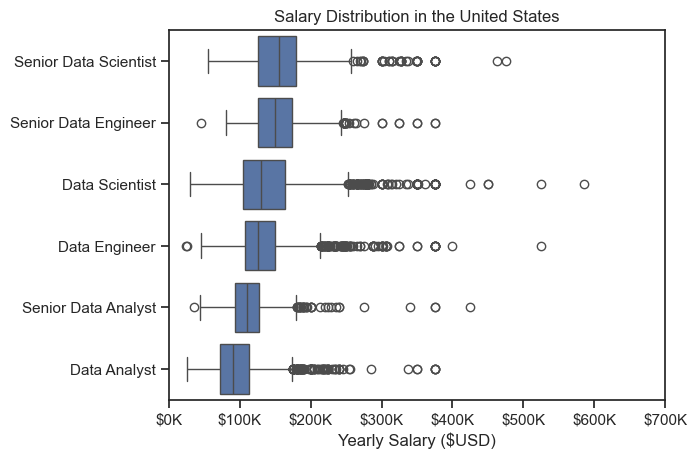

In [21]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 700000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

# Investiage Median Salary vs Skill for Data Scientist

In [22]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()

df_DS_US = df_DS_US.dropna(subset=['salary_year_avg'])

In [23]:
df_DS_US = df_DS_US.explode('job_skills')

df_DS_US[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
100,228222.0,sql
100,228222.0,r
100,228222.0,python
100,228222.0,express
116,114000.0,r


In [34]:
df_DS_top_pay = df_DS_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DS_top_pay = df_DS_top_pay.head(10)

df_DS_top_pay

,count,median
job_skills,,
asana,5,259000.00000
airtable,6,224250.00000
watson,10,213500.00000
unreal,4,211500.00000
ruby on rails,4,195500.00000
redhat,1,189500.00000
notion,9,187500.00000
slack,11,180000.00000
hugging face,15,179000.00000


In [35]:
df_DS_skills = df_DS_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DS_skills = df_DS_skills.head(10)

df_DS_skills

,count,median
job_skills,,
python,3358,131867.0
sql,2463,134500.0
r,2053,126000.0
sas,1022,120000.0
tableau,989,125000.0
aws,768,134000.0
spark,718,135959.5
excel,490,124290.0
tensorflow,474,149646.0


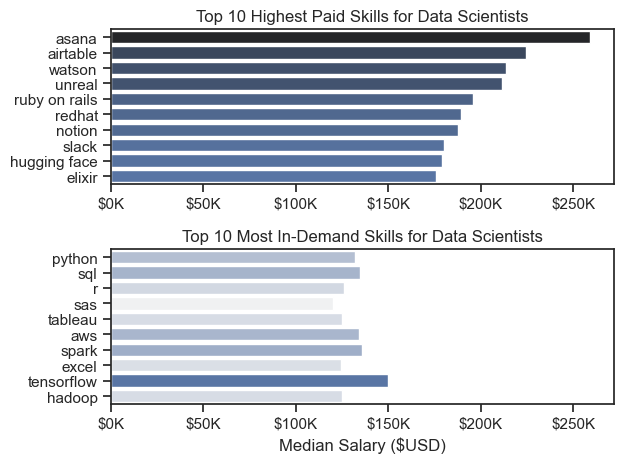

In [33]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

sns.barplot(data=df_DS_top_pay, x='median', y=df_DS_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()

# df_DS_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Scientists')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


sns.barplot(data=df_DS_skills, x='median', y=df_DS_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()
# df_DS_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Scientists')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()